In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:

log1=pd.read_csv('/home/mehdi/Documents/identification_modele_avion/Logs/log_real/log_6_2021-7-20-11-41-56/log_real.csv')
log2=pd.read_csv('/home/mehdi/Documents/identification_modele_avion/Logs/log_real/log_5_2021-7-20-11-12-20/log_real.csv')
log3=pd.read_csv('/home/mehdi/Documents/identification_modele_avion/Logs/log_real/log_4_2021-7-20-10-58-16/log_real.csv')


def gen_grad_acc(df):
    
    df3=df
    import transforms3d as tf3d
    
    acc_ned_grad=np.zeros((len(df3),3))

    acc_ned_grad[:,0]=np.diff(df3['speed[0]'],append=0)/np.diff(df3["t"],append=4e-3)

    acc_ned_grad[:,0]=np.array([i  if abs(i)<30 else 0 for i in acc_ned_grad[:,0]])

    acc_ned_grad[:,1]=np.diff(df3['speed[1]'],append=0)/np.diff(df3["t"],append=4e-3)

    acc_ned_grad[:,1]=np.array([i  if abs(i)<30 else 0 for i in acc_ned_grad[:,1]])


    acc_ned_grad[:,2]=np.diff(df3['speed[2]'],append=0)/np.diff(df3["t"],append=4e-3)

    acc_ned_grad[:,2]=np.array([i  if abs(i)<30 else 0 for i in acc_ned_grad[:,2]])

    acc_body_grad=np.zeros((len(df3),3))

    for i in df3.index:
        q0,q1,q2,q3=df3["q[0]"][i],df3["q[1]"][i],df3["q[2]"][i],df3["q[3]"][i]
         #print(i,q0,q1,q2,q3)
        R=tf3d.quaternions.quat2mat(np.array([q0,q1,q2,q3]))
        acc_body_grad[i]=R.T@(acc_ned_grad[i].reshape((3,1))).flatten()
        
    
    df3['acc_ned_grad[0]'],df3['acc_ned_grad[1]'],df3['acc_ned_grad[2]']=acc_ned_grad.T
    df3['acc_body_grad[0]'],df3['acc_body_grad[1]'],df3['acc_body_grad[2]']=acc_body_grad.T
    
    return df3


log1_new=gen_grad_acc(log1)
log2_new=gen_grad_acc(log2)
log3_new=gen_grad_acc(log3)

#log1_new.to_csv('/home/mehdi/Documents/identification_modele_avion/Logs/log_real/log_real.csv')

In [3]:
log1_new

,Unnamed: 0,t,acc[0],acc[1],acc[2],speed[0],speed[1],speed[2],pos[0],pos[1],...,joystick[1],joystick[2],joystick[3],takeoff,acc_ned_grad[0],acc_ned_grad[1],acc_ned_grad[2],acc_body_grad[0],acc_body_grad[1],acc_body_grad[2]
0,94839,270.262586,0.129475,4.150521,4.047914,14.096188,7.898783,-3.501677,25.386536,3.483852,...,31.446678,-21.568087,250.0,1,0.779390,4.122095,4.906606,3.320726,3.517070,4.275149
1,94840,270.264962,0.146300,4.153680,4.099466,14.098040,7.908578,-3.490019,25.419521,3.502537,...,31.726631,-21.637375,250.0,1,0.779390,4.122095,4.906606,3.326277,3.509419,4.277121
2,94841,270.267486,0.164174,4.157034,4.154230,14.100007,7.918982,-3.477635,25.454560,3.522385,...,31.596925,-21.681552,250.0,1,0.779390,4.122095,4.906606,3.331686,3.501523,4.279382
3,94842,270.270005,0.182012,4.160383,4.208885,14.101971,7.929365,-3.465275,25.489529,3.542194,...,31.384326,-21.719912,250.0,1,0.779390,4.122095,4.906606,3.336910,3.493569,4.281811
4,94843,270.272499,0.199673,4.163698,4.262998,14.103914,7.939646,-3.453038,25.524152,3.561806,...,31.124623,-21.667932,250.0,1,0.779390,4.122095,4.906606,3.341362,3.485406,4.284991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36418,131257,385.122542,-1.200675,2.151952,3.987572,9.278277,4.040060,2.174069,-15.199916,-24.550765,...,110.410900,-48.295543,-250.0,1,-1.258260,2.350530,4.040301,-0.083991,4.344086,2.134035
36419,131258,385.124995,-1.200267,2.161397,3.989105,9.275191,4.045826,2.183980,-15.177092,-24.540531,...,110.502341,-48.321122,-250.0,1,-1.258260,2.350530,4.040301,-0.080195,4.348910,2.124334
36420,131259,385.127500,-1.199850,2.171042,3.990672,9.272039,4.051714,2.194101,-15.153783,-24.530080,...,110.590088,-48.343227,-250.0,1,-1.258260,2.350530,4.040301,-0.076321,4.353808,2.114420
36421,131260,385.130012,-1.199432,2.180714,3.992243,9.268878,4.057619,2.204250,-15.130410,-24.519600,...,110.676508,-48.364273,-250.0,1,-1.258260,2.350530,4.040301,-0.072430,4.358696,2.104462


In [4]:
log2_new

,Unnamed: 0,t,acc[0],acc[1],acc[2],speed[0],speed[1],speed[2],pos[0],pos[1],...,joystick[1],joystick[2],joystick[3],takeoff,acc_ned_grad[0],acc_ned_grad[1],acc_ned_grad[2],acc_body_grad[0],acc_body_grad[1],acc_body_grad[2]
0,7379,21.552439,0.933665,1.599586,-1.332922,12.510049,8.149871,-4.682651,23.974713,11.010401,...,25.787871,-32.259364,250.0,1,0.564770,1.176982,-1.113657,1.371477,0.541164,-0.877881
1,7380,21.554953,1.037954,1.474876,-1.276513,12.511468,8.152830,-4.685450,24.005387,11.029957,...,25.752462,-32.229275,250.0,1,0.564770,1.176982,-1.113657,1.370669,0.542178,-0.878516
2,7381,21.557439,1.141082,1.351555,-1.220733,12.512872,8.155756,-4.688219,24.035720,11.049295,...,25.674117,-32.373030,250.0,1,0.564770,1.176982,-1.113657,1.369758,0.543110,-0.879363
3,7382,21.559978,1.246408,1.225605,-1.163764,12.514306,8.158744,-4.691047,24.066699,11.069045,...,25.582624,-32.565812,250.0,1,0.564770,1.176982,-1.113657,1.368832,0.544143,-0.880164
4,7383,21.562445,1.348748,1.103227,-1.108410,12.515700,8.161648,-4.693794,24.096799,11.088235,...,25.395511,-32.735002,250.0,1,0.564770,1.176982,-1.113657,1.367961,0.545497,-0.880680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53617,60996,178.304988,-9.969701,-3.999747,5.036194,8.285233,1.041681,1.685248,-3.413545,-12.020833,...,250.000000,42.486025,-250.0,1,-15.576539,-5.513136,4.023951,-3.919654,-16.523036,-0.917056
53618,60997,178.307464,-10.067281,-3.950399,5.048177,8.246666,1.028030,1.695212,-3.394986,-12.020036,...,250.000000,42.940183,-250.0,1,-15.576539,-5.513136,4.023951,-3.728160,-16.567940,-0.905310
53619,60998,178.309934,-10.164624,-3.901171,5.060132,8.208192,1.014413,1.705151,-3.376472,-12.019241,...,250.000000,43.407875,-250.0,1,-15.576539,-5.513136,4.023951,-3.536445,-16.610570,-0.893268
53620,60999,178.312454,-10.263939,-3.850946,5.072328,8.168939,1.000520,1.715291,-3.357583,-12.018430,...,250.000000,43.903678,-250.0,1,-15.576539,-5.513136,4.023951,-3.339556,-16.651997,-0.879635


In [5]:
log3_new

,Unnamed: 0,t,acc[0],acc[1],acc[2],speed[0],speed[1],speed[2],pos[0],pos[1],...,joystick[1],joystick[2],joystick[3],takeoff,acc_ned_grad[0],acc_ned_grad[1],acc_ned_grad[2],acc_body_grad[0],acc_body_grad[1],acc_body_grad[2]
0,26011,74.804955,4.497652,-3.062684,1.842886,13.575613,3.443365,-2.737534,20.775016,9.429376,...,55.607431,13.436584,250.0,1,3.974295,-2.828969,-3.333634,4.033748,-3.094663,-3.010505
1,26012,74.807442,4.493738,-3.077824,1.844903,13.585497,3.436329,-2.745825,20.808917,9.440029,...,55.770358,13.395669,250.0,1,3.974295,-2.828969,-3.333634,4.034425,-3.091696,-3.012646
2,26013,74.809947,4.489796,-3.093073,1.846935,13.595452,3.429243,-2.754175,20.843065,9.450760,...,56.003420,13.323839,250.0,1,3.974295,-2.828969,-3.333634,4.035105,-3.088706,-3.014801
3,26014,75.182445,3.903545,-5.360704,2.149048,15.075869,2.375457,-3.995947,25.920792,11.046452,...,32.405143,5.448543,250.0,1,3.974295,-2.828969,-3.333634,4.113611,-2.635244,-3.323386
4,26015,75.184955,3.899595,-5.375984,2.151084,15.085845,2.368357,-4.004315,25.955007,11.057205,...,32.026490,5.468865,250.0,1,3.974295,-2.828969,-3.333634,4.111098,-2.635348,-3.326412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52516,78591,232.352433,-3.059922,-0.663663,1.697377,0.758642,-0.685336,0.444089,52.219981,19.531820,...,250.000000,-2.814594,-250.0,1,-1.853289,-0.318361,5.320973,-1.190348,-0.298169,5.508444
52517,78592,232.354956,-3.126256,-0.733424,1.488219,0.753966,-0.686139,0.457514,52.221781,19.529572,...,250.000000,-2.895554,-250.0,1,-1.853289,-0.318361,5.320973,-1.183979,-0.308344,5.509256
52518,78593,232.357451,-3.191855,-0.802411,1.281382,0.749342,-0.686934,0.470789,52.223561,19.527348,...,250.000000,-2.986441,-250.0,1,-1.853289,-0.318361,5.320973,-1.179235,-0.319814,5.509620
52519,78594,232.359976,-3.258242,-0.872227,1.072058,0.744663,-0.687737,0.484225,52.225362,19.525098,...,250.000000,-3.081446,-250.0,1,-1.853289,-0.318361,5.320973,-1.174810,-0.331813,5.509855


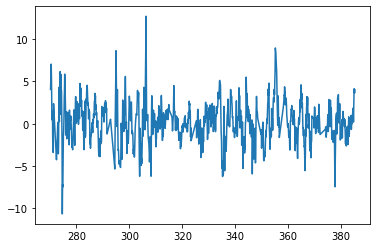

In [6]:
plt.plot(log1.t,log1['acc[2]'])

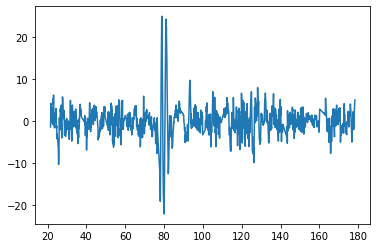

In [7]:
plt.plot(log2.t,log2['acc[2]'])

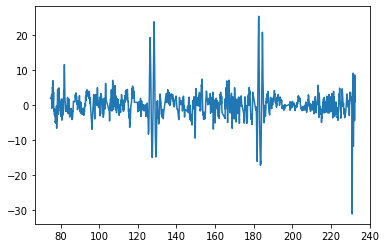

In [8]:
plt.plot(log3.t,log3['acc[2]'])

In [9]:
log1_r=log1[log1["t"]>40]
log1_r=log1_r[log1_r["t"]<450]

log2_r=log2[log2["t"]>10]
log2_r=log2_r[log2_r['t']<250]

log3_r=log3

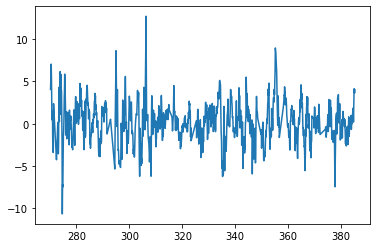

In [10]:
plt.plot(log1_r.t,log1_r['acc[2]'])

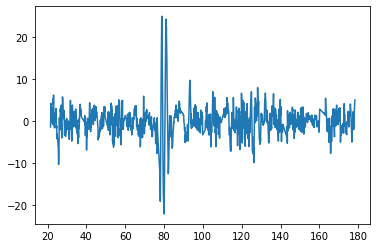

In [11]:
plt.plot(log2_r.t,log2_r['acc[2]'])

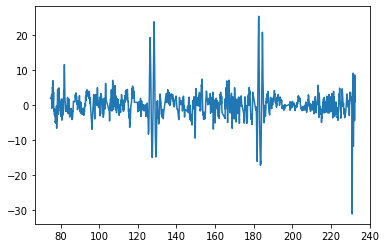

In [12]:
plt.plot(log3_r.t,log3_r['acc[2]'])

In [13]:
log1_r["t"]=log1_r["t"]-log1_r['t'].min()
log2_r["t"]=log2_r["t"]-log2_r['t'].min()+5e-3+log1_r["t"].max()
log3_r["t"]=log3_r["t"]-log3_r['t'].min()+5e-3+log2_r["t"].max()


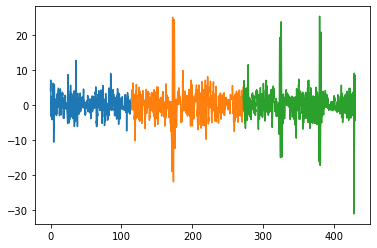

In [14]:
plt.plot(log1_r.t,log1_r['acc[2]'])
plt.plot(log2_r.t,log2_r['acc[2]'])
plt.plot(log3_r.t,log3_r['acc[2]'])

In [15]:
df3=pd.concat([log1_r,log2_r,log3_r])

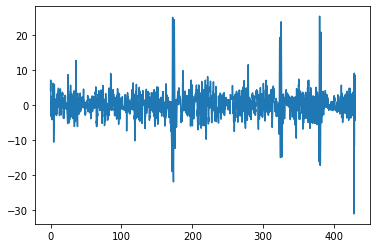

In [16]:
plt.plot(df3.t,df3['acc[2]'])

In [17]:
df3=df3.reset_index()

In [18]:
import transforms3d as tf3d

In [19]:
acc_ned_grad=np.zeros((len(df3),3))

acc_ned_grad[:,0]=np.diff(df3['speed[0]'],append=0)/np.diff(df3["t"],append=4e-3)

acc_ned_grad[:,0]=np.array([i  if abs(i)<30 else 0 for i in acc_ned_grad[:,0]])

acc_ned_grad[:,1]=np.diff(df3['speed[1]'],append=0)/np.diff(df3["t"],append=4e-3)

acc_ned_grad[:,1]=np.array([i  if abs(i)<30 else 0 for i in acc_ned_grad[:,1]])


acc_ned_grad[:,2]=np.diff(df3['speed[2]'],append=0)/np.diff(df3["t"],append=4e-3)

acc_ned_grad[:,2]=np.array([i  if abs(i)<30 else 0 for i in acc_ned_grad[:,2]])


In [20]:
acc_body_grad=np.zeros((len(df3),3))

for i in df3.index:
    q0,q1,q2,q3=df3["q[0]"][i],df3["q[1]"][i],df3["q[2]"][i],df3["q[3]"][i]
#     print(i,q0,q1,q2,q3)
    R=tf3d.quaternions.quat2mat(np.array([q0,q1,q2,q3]))
    acc_body_grad[i]=R.T@(acc_ned_grad[i].reshape((3,1))).flatten()
    

In [22]:

df3['acc_ned_grad[0]'],df3['acc_ned_grad[1]'],df3['acc_ned_grad[2]']=acc_ned_grad.T
df3['acc_body_grad[0]'],df3['acc_body_grad[1]'],df3['acc_body_grad[2]']=acc_body_grad.T

(-15.0, 15.0)

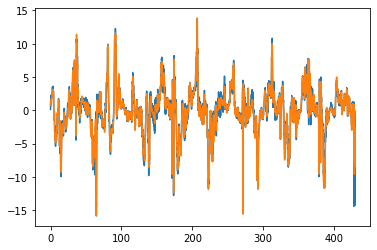

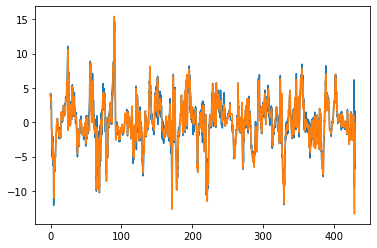

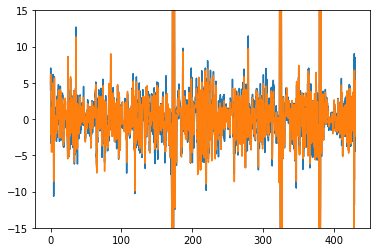

In [25]:
[(plt.figure(),plt.plot(df3["t"],df3['acc[%i]'%(i)],df3["t"],df3['acc_ned_grad[%i]'%(i)])) for i in range(3)]
plt.gca().set_ylim(-15,15)